# 机器学习实例：鸢尾花数据集

In [2]:
# 导入常用工具包
import numpy as np # 线性代数计算工具包
import pandas as pd # 数据载入和处理工具包
import seaborn as sns # 绘图工具包
import matplotlib.pyplot as plt # 绘图工具包
sns.set(style="ticks", font_scale=1.4) # 设置绘图字体
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置绘图显示中文字符
plt.rcParams['axes.unicode_minus'] = False

# 导入模型算法工具包
from sklearn.linear_model import LogisticRegression  # 逻辑回归算法
from sklearn.model_selection import train_test_split # 拆分数据集
from sklearn.neighbors import KNeighborsClassifier # K 近邻算法
from sklearn import svm  # 支持向量机算法
from sklearn import metrics # 模型评估工具包
from sklearn.tree import DecisionTreeClassifier # 决策树算法

# 数据文件在 "./input/" 目录下.
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

database.sqlite
Iris.csv



## 准备数据

## 数据集
数据来源 https://en.wikipedia.org/wiki/Iris_flower_data_set

3 种鸢尾花: 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/450px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width: 100px; display:inline"/>
* Iris Setosa（山鸢尾）
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/800px-Iris_versicolor_3.jpg" style="width: 150px;display:inline"/>
* Iris Versicolour（变色鸢尾）
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/736px-Iris_virginica.jpg" style="width: 150px;display:inline"/>
* Iris Virginica（维吉尼亚鸢尾）

### 数据集包括:
   1. 花萼长度
   2. 花萼宽度
   3. 花瓣长度
   4. 花瓣宽度

In [3]:
iris = pd.read_csv("./input/Iris.csv")

In [4]:
iris.head(2) #浏览数据集的前两行

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


## 数据预处理

In [5]:
iris.info()  #检查数据集中是否有无效值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe() #检查数据集中是否有异常值

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.groupby('Species').Species.count() #检查是否存在不平衡数据

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris.drop('Id',axis=1,inplace=True) #删掉第一列无用数据, axis=1 表示删除列, inplace =1 表示删除列后更新变量

## 数据探索

### 数据关联性探索

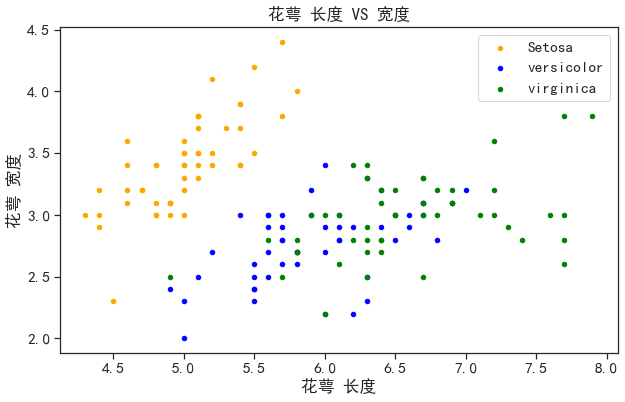

In [9]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("花萼 长度")
fig.set_ylabel("花萼 宽度")
fig.set_title("花萼 长度 VS 宽度")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

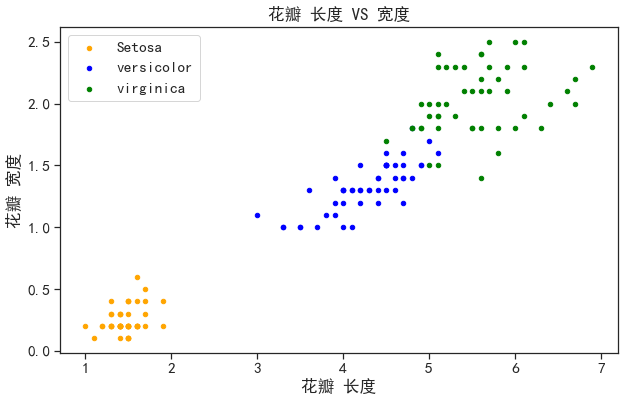

In [10]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("花瓣 长度")
fig.set_ylabel("花瓣 宽度")
fig.set_title("花瓣 长度 VS 宽度")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### 数据分布探索

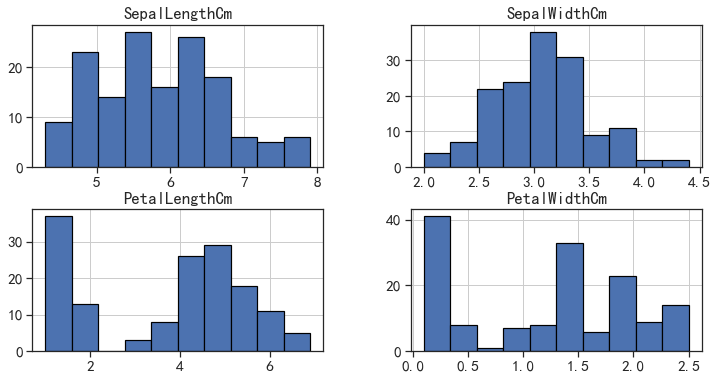

In [11]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### 数据随品种的分布

Text(0, 0.5, '花萼长度')

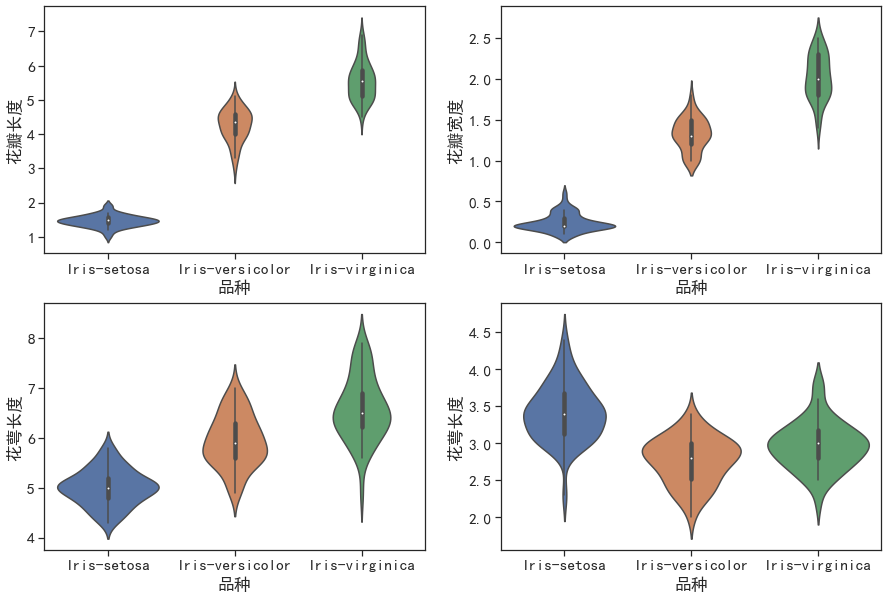

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.xlabel('品种')
plt.ylabel('花瓣长度')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.xlabel('品种')
plt.ylabel('花瓣宽度')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.xlabel('品种')
plt.ylabel('花萼长度')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.xlabel('品种')
plt.ylabel('花萼长度')

## 划分数据集

In [13]:
iris.shape # 查看数据集数据量

(150, 5)

In [14]:
train, test = train_test_split(iris, test_size = 0.3)# 将原始数据划分为训练集和测试集
# test_size=0.3 表示按照 7：3 划分数据集. 训练数据占总数据集 70%, 测试数据占总数据集 30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# 训练数据特征
train_y=train.Species# 训练数据的实际类别
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # 测试数据特征
test_y =test.Species   #测试数据的实际类别

In [16]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
28,5.2,3.4,1.4,0.2


In [17]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
43,5.0,3.5,1.6,0.6
127,6.1,3.0,4.9,1.8


In [18]:
train_y.head()  ##训练数据的实际类别

91     Iris-versicolor
28         Iris-setosa
82     Iris-versicolor
101     Iris-virginica
33         Iris-setosa
Name: Species, dtype: object

## 选择、训练和评估模型

### 支持向量机

In [19]:
model = svm.SVC() #建立支持向量机模型
model.fit(train_X,train_y) # 训练模型
prediction=model.predict(test_X) # 测试模型
print('支持向量机模型的正确率为:',metrics.accuracy_score(prediction,test_y))# 模型评估

支持向量机模型的正确率为: 0.9333333333333333


### 逻辑回归

In [20]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('逻辑回归模型的正确率为',metrics.accuracy_score(prediction,test_y))

逻辑回归模型的正确率为 0.9333333333333333


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 决策树

In [21]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('决策树模型的正确率为',metrics.accuracy_score(prediction,test_y))

决策树模型的正确率为 0.9333333333333333


### K 近邻

In [24]:
model=KNeighborsClassifier(n_neighbors=7) # n_neighbors=3 表示设置模型参数近邻数量为 3
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('K 近邻模型的正确率为',metrics.accuracy_score(prediction,test_y))

K 近邻模型的正确率为 0.9555555555555556


### 参数微调

Text(0, 0.5, '正确率')

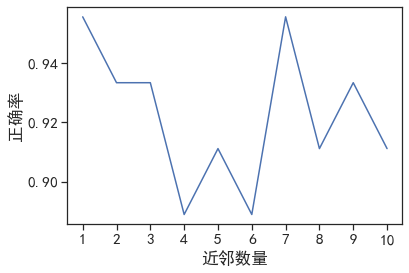

In [23]:
a_index=list(range(1,11))
a=pd.Series(dtype=np.float64)
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('近邻数量')
plt.ylabel('正确率')

# 总结

### 准备数据

    iris = pd.read_csv("./input/Iris.csv")

### 数据预处理

    iris.info(), iris.describe()
   
### 数据探索

    iris.plot(), iris.hist()

### 划分数据集

    train, test = train_test_split(iris, test_size = 0.3)

### 选择 & 建立模型

    LogisticRegression()  # 逻辑回归
    KNeighborsClassifier() # K 近邻
    svm.SVC()  # 支持向量机
    DecisionTreeClassifier() # 决策树

### 训练模型

    model.fit()
    
### 评估模型

    metrics.accuracy_score(prediction,test_y)

### 预测

    model.predict(test_X)